In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import math
from scipy import stats
import statistics
import json
from func import *

import warnings
warnings.simplefilter("ignore", DeprecationWarning)

pd.options.display.max_colwidth = 100
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
H = pd.read_csv('../data/Harmanpreet.tsv',delimiter='\t')
T = pd.read_csv('../data/Tristan.tsv',delimiter='\t')
Y = pd.read_csv('../data/Yan.tsv',delimiter='\t')

In [3]:
df = pd.concat([H,T,Y])

In [4]:
df = df[['Name', 'title','coding']]
df.index = range(0,len(df))
df = df[df['coding'].notna()]
df['coding'][df['coding']=='s'] = 'S'
df

,Name,title,coding
0,t3_jyjecp,Wisconsin officials: Trump observers obstructing recount,N
1,t3_jyhv9o,Trump was pictured on his Virginia golf course during a coronavirus meeting for G20 leaders,I
2,t3_jyj5z6,Detroit voters sue Donald Trump over unsubstantiated claims of voter fraud,S
3,t3_jyi4xi,Impeach the president again — Removal from office wouldn’t be the goal this time. It would be to...,I
4,t3_jyih12,"Yes, Trump Is (Still) Engaged in an Attempted Coup; and Yes, It Might Lead to a Constitutional C...",S
...,...,...,...
963,t3_jyby0o,Trump Announces Groundbreaking Rules to Lower Prescription Drug Prices,I
964,t3_jyr204,Trump campaign files for new recount in Georgia,N
965,t3_jynua5,"Release: Toomey Statement on PA Federal Court Decision, Congratulates President-elect Biden | U....",L
966,t3_jyoy6m,Biden to ‘Racist’ Trump Voters: ‘Let’s Heal.’ That’s Easy for Him to Say.,I


In [5]:
all_posts = pd.read_csv('../data/clean_data_all_posts.tsv',delimiter='\t')

In [6]:
all_posts.head()

,Name,title,coding
0,t3_jyjecp,Wisconsin officials: Trump observers obstructing recount,NaN
1,t3_jyhv9o,Trump was pictured on his Virginia golf course during a coronavirus meeting for G20 leaders,NaN
2,t3_jyj5z6,Detroit voters sue Donald Trump over unsubstantiated claims of voter fraud,NaN
3,t3_jyi4xi,Impeach the president again — Removal from office wouldn’t be the goal this time. It would be to...,NaN
4,t3_jyki9e,AOC Attacks Double Standard After Accused Kenosha Shooter Rittenhouse's Release: 'Law and Disorder',NaN


In [7]:
for idx, row in all_posts.iterrows():
    tmp_name = row.Name
    
    if tmp_name in df.Name.unique():
        all_posts.loc[idx, 'coding'] = df['coding'][df['Name'] == tmp_name].values[0]
    else:
        all_posts.loc[idx, 'coding'] = 'OTHER'

In [8]:
all_posts.coding.unique()

array(['N', 'I', 'S', 'OTHER', 'L'], dtype=object)

**Check topic distribution**

In [9]:
topics = list(df['coding'].unique())
topics_cnt = [df['coding'][df['coding']==tp].count() for tp in topics]

<BarContainer object of 4 artists>

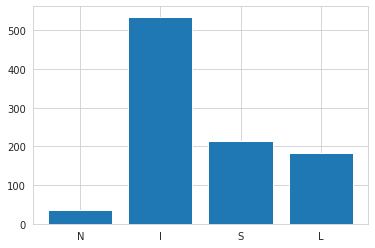

In [10]:
plt.bar(topics, topics_cnt)

In [11]:
print(topics)
print(topics_cnt)

['N', 'I', 'S', 'L']
[35, 535, 213, 183]


**Add Biden or Trump labels (T=Trump, B=Biden, TB=both)**

In [12]:
df_cand = add_candidate(df)
df_cand = df_cand[df_cand['coding'].notna()]

In [13]:
df_cand.head()

,Name,title,coding,candidate
0,t3_jyjecp,Wisconsin officials: Trump observers obstructing recount,N,T
1,t3_jyhv9o,Trump was pictured on his Virginia golf course during a coronavirus meeting for G20 leaders,I,T
2,t3_jyj5z6,Detroit voters sue Donald Trump over unsubstantiated claims of voter fraud,S,T
3,t3_jyi4xi,Impeach the president again — Removal from office wouldn’t be the goal this time. It would be to...,I,T
4,t3_jyih12,"Yes, Trump Is (Still) Engaged in an Attempted Coup; and Yes, It Might Lead to a Constitutional C...",S,T


In [14]:
cand_names = list(df_cand['candidate'].unique())
cand_cnt = [df_cand['candidate'][df_cand['candidate']==cand].count() for cand in cand_names]

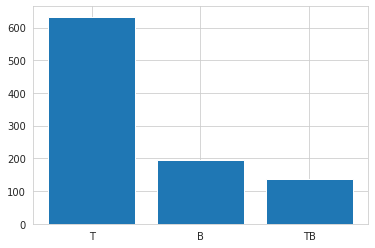

In [15]:
plt.bar(cand_names, cand_cnt)
plt.show()

In [16]:
print(cand_names)
print(cand_cnt)

['T', 'B', 'TB']
[633, 196, 137]


**# of posts for each topic for Trump**

<BarContainer object of 4 artists>

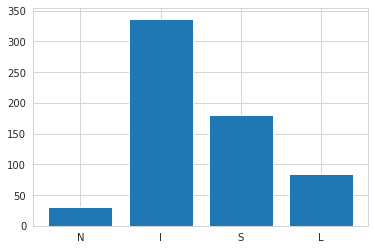

In [20]:
topics_cnt_trump = [df_cand['coding'][(df_cand['coding']==tp) & (df_cand['candidate']=='T')].count() for tp in topics]
plt.bar(topics, topics_cnt_trump)

In [21]:
print(topics)
print(topics_cnt_trump)

['N', 'I', 'S', 'L']
[31, 337, 180, 85]


**# of posts for each topic for Biden**

<BarContainer object of 4 artists>

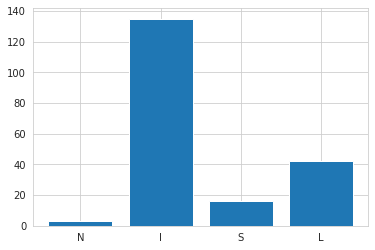

In [23]:
topics_cnt_biden = [df_cand['coding'][(df_cand['coding']==tp) & (df_cand['candidate']=='B')].count() for tp in topics]
plt.bar(topics, topics_cnt_biden)

In [24]:
print(topics)
print(topics_cnt_biden)

['N', 'I', 'S', 'L']
[3, 135, 16, 42]


**# of posts for each topic for both candidates**

<BarContainer object of 4 artists>

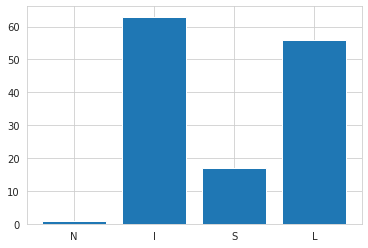

In [25]:
topics_cnt_both = [df_cand['coding'][(df_cand['coding']==tp) & (df_cand['candidate']=='TB')].count() for tp in topics]
plt.bar(topics, topics_cnt_both)

In [26]:
print(topics)
print(topics_cnt_both)

['N', 'I', 'S', 'L']
[1, 63, 17, 56]


## 1. Tf-idf

In [17]:
num_words = 10 # top words under a topic

In [18]:
stop_words = set()
stop_words = load_stop_words(stop_words)
print(len(stop_words))

134


In [19]:
topic_dict_all_posts = create_dict(all_posts,stop_words,no_stop_words=True,no_trump_biden=False) # posts with trump or biden
topic_count_all_posts = create_counts(topic_dict_all_posts)

In [20]:
topic_dict_all_cands = create_dict(df_cand,stop_words,no_stop_words=True,no_trump_biden=False) # posts with trump or biden
topic_count_all_cands = create_counts(topic_dict_all_cands)
topic_tfidf_all_cands = create_tfidf(topic_count_all_posts, topic_count_all_cands)

In [21]:
print({k:[k1 for k1, v1 in sorted(v.items(), key=lambda item: item[1],reverse=True)[:num_words]] for k, v in topic_tfidf_all_cands.items()})

{'N': ['observers', 'obstructing', 'wisconsin', 'recount', 'officials', 'trump', 'results', 'votes', 'election'], 'I': ['biden', 'trump', 'covid', 'cabinet', 'team', 'inauguration', 'legal', 'joe', 'tells', 'picks'], 'S': ['trump', 'detroit', 'fraud', 'biden', 'appeals', 'overturn', 'claims', 'voter', 'coup', 'sue'], 'L': ['biden', 'certifies', 'toomey', 'trump', 'congratulates', 'board', 'pa', 'win', 'senator', 'pat']}


92.45943790164432


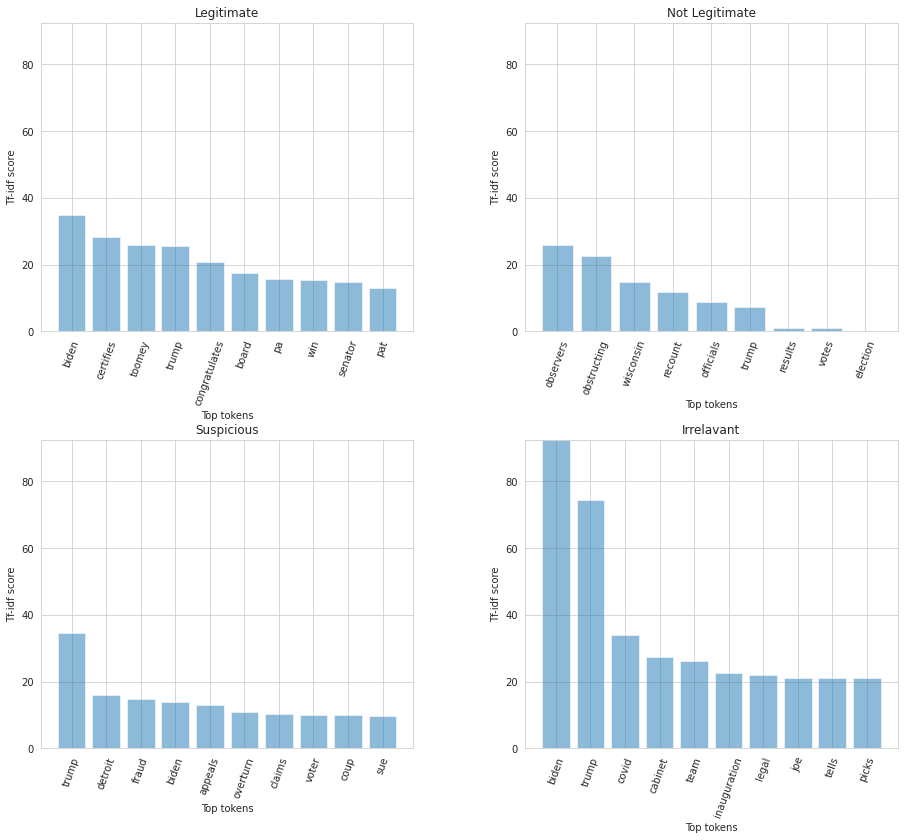

In [22]:
plot_word_freq(topic_tfidf_all_cands,10,"word_freq1_new.png") # input dictionary and max number of words to plot

/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

median of word frequency:  4.9091581289126145
median of word frequency:  8.684035604021842
median of word frequency:  4.5814536593707755
median of word frequency:  8.047189562170502


/home/ubuntu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


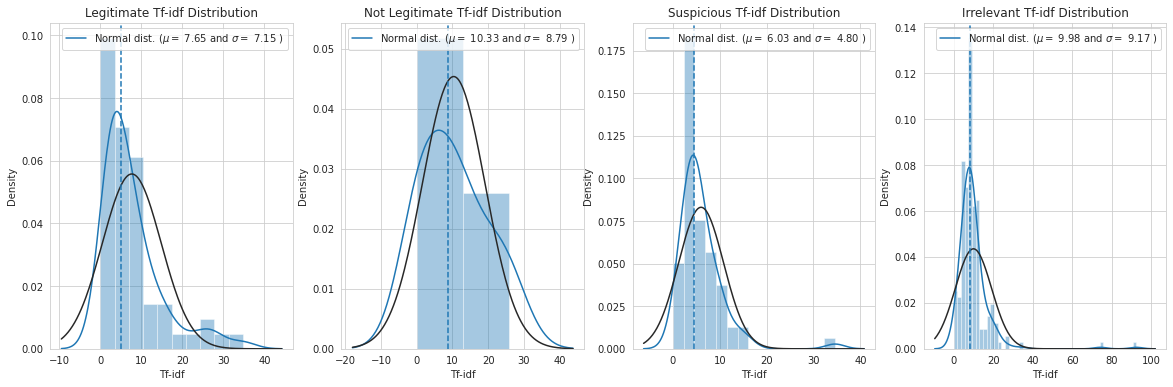

In [23]:
plot_tfidf_dist(topic_tfidf_all_cands)

## 2. Characterize topics for each candidate

In [24]:
df_trump = df_cand[df_cand['candidate'] != 'B']
df_biden = df_cand[df_cand['candidate'] != 'T']
df_common = df_cand[df_cand['candidate'] == 'TB']

### 2.1 Trump

In [25]:
topic_dict_trump = create_dict(df_trump,stop_words,no_stop_words=True,no_trump_biden=True)
topic_count_trump = create_counts(topic_dict_trump)
topic_tfidf_trump = create_tfidf(topic_count_all_posts, topic_count_trump)
print('Trump:')
print({k:[k1 for k1, v1 in sorted(v.items(), key=lambda item: item[1],reverse=True)[:num_words]] for k, v in topic_tfidf_trump.items()})

Trump:
{'N': ['observers', 'obstructing', 'wisconsin', 'recount', 'officials', 'results', 'election'], 'I': ['covid', 'team', 'legal', 'supporters', 'golfing', 'middle', 'hogan', 'christie', 'chris', 'israel'], 'S': ['detroit', 'fraud', 'appeals', 'overturn', 'claims', 'voter', 'coup', 'sue', 'expedited', 'legal'], 'L': ['toomey', 'congratulates', 'begin', 'judge', 'pa', 'senator', 'legal', 'board', 'win', 'pat']}


25.751006598945605


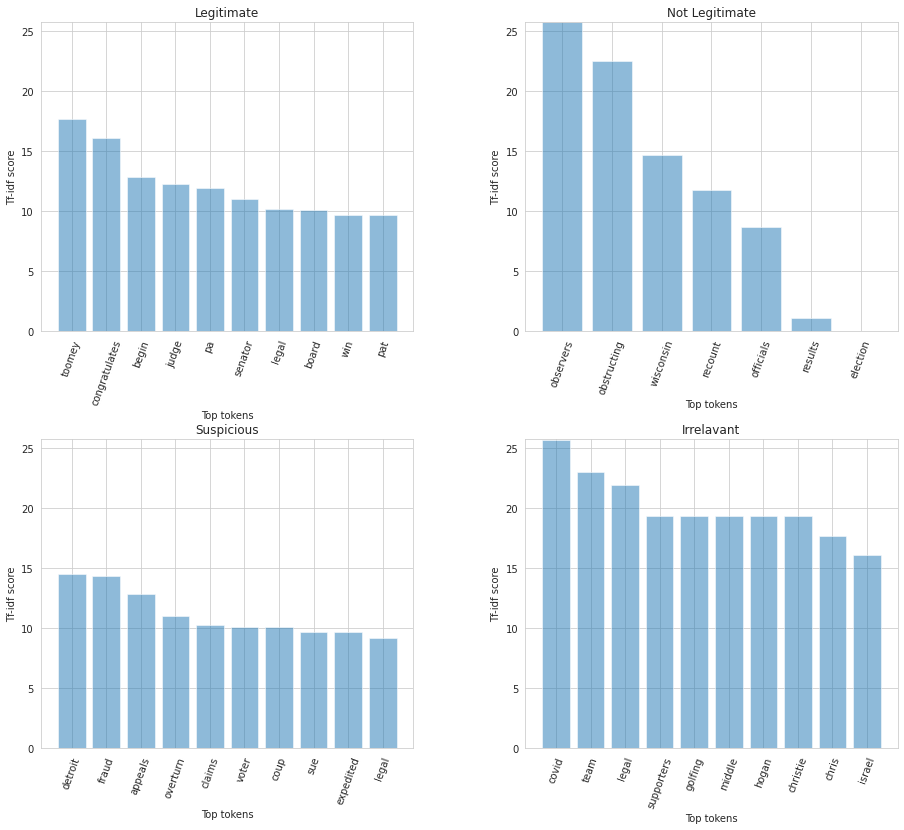

In [26]:
# Note that this time we get rid of "trump" and "biden"
plot_word_freq(topic_tfidf_trump,10,"word_freq_trump_new.png")

### 2.2 Biden

In [27]:
topic_dict_biden = create_dict(df_biden, stop_words,no_stop_words=True,no_trump_biden=True)
topic_count_biden = create_counts(topic_dict_biden)
# topic_tfidf_all_posts_biden = create_tfidf(all_posts, stop_words, topic_count_biden, all_posts_no_stop_words=True, all_posts_no_trump_biden=True)
topic_tfidf_biden = create_tfidf(topic_count_all_posts, topic_count_biden)
print('Biden:')
print({k:[k1 for k1, v1 in sorted(v.items(), key=lambda item: item[1],reverse=True)[:num_words]] for k, v in topic_tfidf_biden.items()})

Biden:
{'I': ['cabinet', 'inauguration', 'picks', 'administration', 'climate', 'account', 'twitter', 'hand', 'omar', 'middle'], 'L': ['certifies', 'congratulates', 'toomey', 'win', 'board', 'senator', 'victory', 'begin', 'pat', 'certified'], 'S': ['win', 'gop', 'says', 'vote', 'election'], 'N': []}


27.48872195622465


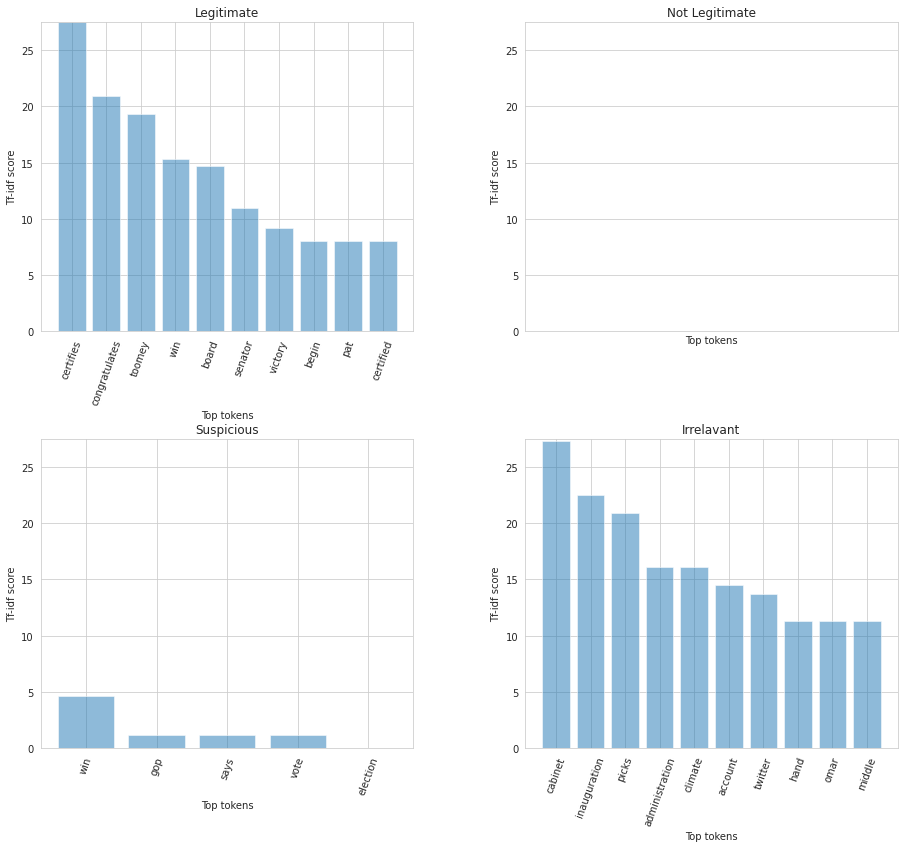

In [28]:
plot_word_freq(topic_tfidf_biden,10,"word_freq_biden_new.png")

### 2.3 Common

In [29]:
topic_dict_common = create_dict(df_common, stop_words,no_stop_words=True,no_trump_biden=True)
topic_count_common = create_counts(topic_dict_common)
topic_tfidf_common = create_tfidf(topic_count_all_posts, topic_count_common)
print('Common:')
print({k:[k1 for k1, v1 in sorted(v.items(), key=lambda item: item[1],reverse=True)[:num_words]] for k, v in topic_tfidf_common.items()})

Common:
{'L': ['congratulates', 'toomey', 'win', 'certifies', 'begin', 'board', 'senator', 'overturn', 'effort', 'victory'], 'I': ['omar', 'middle', 'east', 'agreements', 'account', 'inauguration', 'ilhan', 'peace', 'urges', 'twitter'], 'S': ['win'], 'N': []}


16.094379124341003


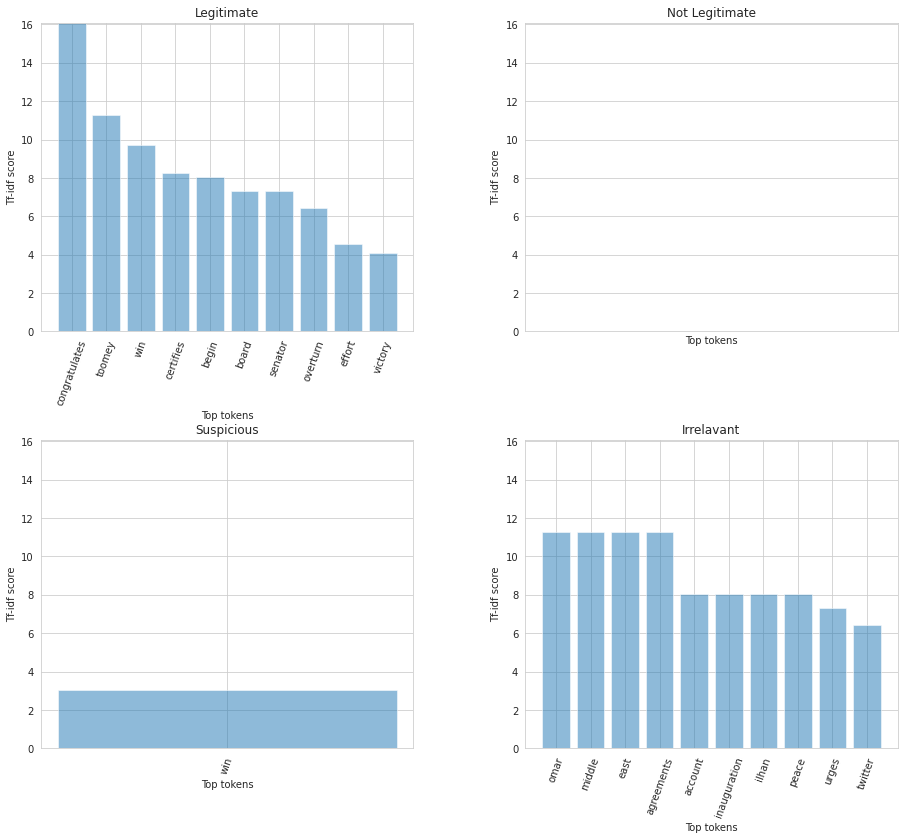

In [30]:
plot_word_freq(topic_tfidf_common,10,"word_freq_common_new.png")

## 3. Time series

In [32]:
post_dates = read_in("../data/post_dates.json")

In [33]:
df_trump1 = df_trump2 = df_trump3 = df_biden1 = df_biden2 = df_biden3 = pd.DataFrame(columns = ["Name", "title", "coding", "candidate"])

In [34]:
for k, v in post_dates[0].items():
    if k in df_trump.Name.values:
        if v == '21/Nov/2020':
            df_trump1 = pd.concat([df_trump1, df_trump[df_trump['Name'] == k]])
        elif v == '22/Nov/2020':
            df_trump2 = pd.concat([df_trump2, df_trump[df_trump['Name'] == k]])
        elif v == '23/Nov/2020':
            df_trump3 = pd.concat([df_trump3, df_trump[df_trump['Name'] == k]])
            
    if k in df_biden.Name.values:
        if v == '21/Nov/2020':
            df_biden1 = pd.concat([df_biden1, df_biden[df_biden['Name'] == k]])
        elif v == '22/Nov/2020':
            df_biden2 = pd.concat([df_biden2, df_biden[df_biden['Name'] == k]])
        elif v == '23/Nov/2020':
            df_biden3 = pd.concat([df_biden3, df_biden[df_biden['Name'] == k]])

In [35]:
for tmp_df in [df_trump1, df_trump2, df_trump3, df_biden1, df_biden2, df_biden3]:
    tmp_df.index = range(0,len(tmp_df)) # re-index

### 3.1 Let's see the # of mentions of Trump and Biden over these 3 days

In [36]:
mentions_cand = pd.DataFrame(columns = ["Trump", "Biden"])
mentions_cand.loc['21/Nov/2020'] = [len(df_trump1), len(df_biden1)]
mentions_cand.loc['22/Nov/2020'] = [len(df_trump2), len(df_biden2)]
mentions_cand.loc['23/Nov/2020'] = [len(df_trump3), len(df_biden3)]

In [37]:
mentions_cand

,Trump,Biden
21/Nov/2020,245,114
22/Nov/2020,253,88
23/Nov/2020,272,131


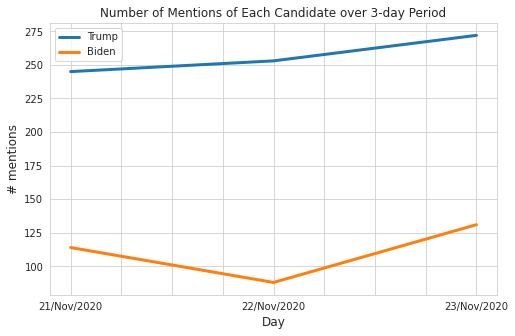

In [38]:
mentions_cand.plot(figsize=(8,5), linewidth=3, fontsize=10)
plt.title('Number of Mentions of Each Candidate over 3-day Period')
plt.xlabel('Day', fontsize=12)
plt.ylabel('# mentions', fontsize=12);

### 3.2 We are also interested to see the # of mentions of each topic over these 3 days

In [39]:
def calculate_topic_mentions(topic, trump1, trump2, trump3, biden1, biden2, biden3):
    num1 = len(trump1[trump1['coding']==topic]) + len(biden1[biden1['coding']==topic])
    num2 = len(trump2[trump2['coding']==topic]) + len(biden2[biden2['coding']==topic])
    num3 = len(trump3[trump3['coding']==topic]) + len(biden3[biden3['coding']==topic])
    return num1, num2, num3

N = calculate_topic_mentions('N', df_trump1, df_trump2, df_trump3, df_biden1, df_biden2, df_biden3)
L = calculate_topic_mentions('L', df_trump1, df_trump2, df_trump3, df_biden1, df_biden2, df_biden3)
S = calculate_topic_mentions('S', df_trump1, df_trump2, df_trump3, df_biden1, df_biden2, df_biden3)
I = calculate_topic_mentions('I', df_trump1, df_trump2, df_trump3, df_biden1, df_biden2, df_biden3)

In [40]:
mentions_topics = pd.DataFrame(columns = ['Not Legitimate','Legitimate','Suspicious','Irrelavant'])
mentions_topics.loc['21/Nov/2020'] = [N[0], L[0], S[0], I[0]]
mentions_topics.loc['22/Nov/2020'] = [N[1], L[1], S[1], I[1]]
mentions_topics.loc['23/Nov/2020'] = [N[2], L[2], S[2], I[2]]
mentions_topics

,Not Legitimate,Legitimate,Suspicious,Irrelavant
21/Nov/2020,7,73,100,179
22/Nov/2020,23,56,69,193
23/Nov/2020,6,110,61,226


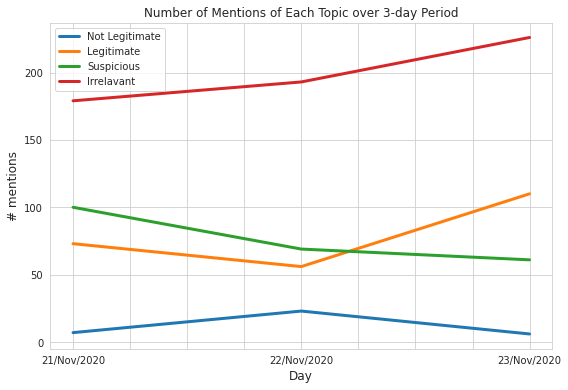

In [41]:
mentions_topics.plot(figsize=(9,6), linewidth=3, fontsize=10)
plt.title('Number of Mentions of Each Topic over 3-day Period')
plt.xlabel('Day', fontsize=12)
plt.ylabel('# mentions', fontsize=12)
plt.legend(loc='upper left');

### 3.3 Of course we'd like to see how the topic keywords (top 5) changed

In [42]:
top = 10

**21/Nov/2020**

In [43]:
day1_biden = create_dict(df_biden1, stop_words,no_stop_words=True,no_trump_biden=True)
day1_biden = create_counts(day1_biden)
day1_biden = create_tfidf(topic_count_all_posts, day1_biden)
print('Biden:')
print({k:[k1 for k1, v1 in sorted(v.items(), key=lambda item: item[1],reverse=True)[:top]] for k, v in day1_biden.items()})

Biden:
{'I': ['inauguration', 'account', 'twitter', 'cabinet', 'administration', 'day', 'could', 'elect', 'says', 'transition'], 'L': ['certifies', 'win', 'georgia', 'state', 'michigan', 'president', 'election'], 'S': ['win'], 'N': []}


In [44]:
day1_trump = create_dict(df_trump1, stop_words,no_stop_words=True,no_trump_biden=True)
day1_trump = create_counts(day1_trump)
day1_trump = create_tfidf(topic_count_all_posts, day1_trump)

print('Trump:')
print({k:[k1 for k1, v1 in sorted(v.items(), key=lambda item: item[1],reverse=True)[:top]] for k, v in day1_trump.items()})

Trump:
{'S': ['black', 'effort', 'fraud', 'coup', 'michigan', 'claims', 'campaign', 'gop', 'voters', 'results'], 'I': ['covid', 'weeks', 'account', 'coronavirus', 'us', 'twitter', 'pandemic', 'leaders', 'meeting', 'president'], 'L': ['judge', 'win', 'media', 'victory', 'michigan', 'results', 'georgia', 'election'], 'N': ['observers', 'obstructing', 'wisconsin', 'officials', 'recount']}


**22/Nov/2020**

In [45]:
day2_biden = create_dict(df_biden2, stop_words,no_stop_words=True,no_trump_biden=True)
day2_biden = create_counts(day2_biden)
day2_biden = create_tfidf(topic_count_all_posts, day2_biden)

print('Biden:')
print({k:[k1 for k1, v1 in sorted(v.items(), key=lambda item: item[1],reverse=True)[:top]] for k, v in day2_biden.items()})

Biden:
{'L': ['congratulates', 'toomey', 'pat', 'senator', 'sen', 'legal', 'gop'], 'I': ['cabinet', 'picks', 'staff', 'inauguration', 'name', 'tuesday', 'elect', 'says', 'president'], 'S': [], 'N': []}


In [46]:
day2_trump = create_dict(df_trump2, stop_words,no_stop_words=True,no_trump_biden=True)
day2_trump = create_counts(day2_trump)
day2_trump = create_tfidf(topic_count_all_posts, day2_trump)

print('Trump:')
print({k:[k1 for k1, v1 in sorted(v.items(), key=lambda item: item[1],reverse=True)[:top]] for k, v in day2_trump.items()})

Trump:
{'N': ['observers', 'obstructing', 'wisconsin', 'recount', 'officials', 'election'], 'I': ['christie', 'hogan', 'chris', 'team', 'golfing', 'legal', 'covid', 'tells', 'golf', 'name'], 'S': ['fraud', 'voter', 'overturn', 'supreme', 'claims', 'legal', 'team', 'results', 'voters', 'gop'], 'L': ['toomey', 'congratulates', 'pat', 'plausible', 'legal', 'pa', 'senator', 'sen', 'says', 'gop']}


**23/Nov/2020**

In [47]:
day3_biden = create_dict(df_biden3, stop_words,no_stop_words=True,no_trump_biden=True)
day3_biden = create_counts(day3_biden)
day3_biden = create_tfidf(topic_count_all_posts, day3_biden)

print('Biden:')
print({k:[k1 for k1, v1 in sorted(v.items(), key=lambda item: item[1],reverse=True)[:top]] for k, v in day3_biden.items()})

Biden:
{'I': ['climate', 'omar', 'middle', 'east', 'agreements', 'peace', 'kerry', 'first', 'secretary', 'john'], 'L': ['certifies', 'board', 'win', 'victory', 'senator', 'michigan', 'overturn', 'vote', 'results', 'gop'], 'S': [], 'N': []}


In [48]:
day3_trump = create_dict(df_trump3, stop_words,no_stop_words=True,no_trump_biden=True)
day3_trump = create_counts(day3_trump)
day3_trump = create_tfidf(topic_count_all_posts, day3_trump)

print('Trump:')
print({k:[k1 for k1, v1 in sorted(v.items(), key=lambda item: item[1],reverse=True)[:top]] for k, v in day3_trump.items()})

Trump:
{'I': ['bernstein', 'names', 'senators', 'legal', 'supporters', 'carl', 'expressed', 'powell', 'lawyer', 'team'], 'L': ['blow', 'board', 'begin', 'loss', 'certifies', 'dismisses', 'another', 'certify', 'judge', 'win'], 'S': ['appeals', 'powell', 'legal', 'team', 'claims', 'fraud', 'sidney', 'pennsylvania', 'campaign', 'voters'], 'N': []}


### 3.4 To sum up

In [49]:
trump = [{k:[k1 for k1, v1 in sorted(v.items(), key=lambda item: item[1],reverse=True)[:top]] for k, v in tmp_trump.items()} for tmp_trump in [day1_trump, day2_trump, day3_trump]]
biden = [{k:[k1 for k1, v1 in sorted(v.items(), key=lambda item: item[1],reverse=True)[:top]] for k, v in tmp_biden.items()} for tmp_biden in [day1_biden, day2_biden, day3_biden]]

**Trump**

In [50]:
trump_words = pd.DataFrame(columns = ['Not Legitimate','Legitimate','Suspicious','Irrelavant'])
trump_words.loc['21/Nov/2020'] = [trump[0]['N'], trump[0]['L'], trump[0]['S'], trump[0]['I']]
trump_words.loc['22/Nov/2020'] = [trump[1]['N'], trump[1]['L'], trump[1]['S'], trump[1]['I']]
trump_words.loc['23/Nov/2020'] = [trump[2]['N'], trump[2]['L'], trump[2]['S'], trump[2]['I']]
trump_words

,Not Legitimate,Legitimate,Suspicious,Irrelavant
21/Nov/2020,"[observers, obstructing, wisconsin, officials, recount]","[judge, win, media, victory, michigan, results, georgia, election]","[black, effort, fraud, coup, michigan, claims, campaign, gop, voters, results]","[covid, weeks, account, coronavirus, us, twitter, pandemic, leaders, meeting, president]"
22/Nov/2020,"[observers, obstructing, wisconsin, recount, officials, election]","[toomey, congratulates, pat, plausible, legal, pa, senator, sen, says, gop]","[fraud, voter, overturn, supreme, claims, legal, team, results, voters, gop]","[christie, hogan, chris, team, golfing, legal, covid, tells, golf, name]"
23/Nov/2020,[],"[blow, board, begin, loss, certifies, dismisses, another, certify, judge, win]","[appeals, powell, legal, team, claims, fraud, sidney, pennsylvania, campaign, voters]","[bernstein, names, senators, legal, supporters, carl, expressed, powell, lawyer, team]"


**Biden**

In [51]:
biden_words = pd.DataFrame(columns = ['Not Legitimate','Legitimate','Suspicious','Irrelavant'])
biden_words.loc['21/Nov/2020'] = [biden[0]['N'], biden[0]['L'], biden[0]['S'], biden[0]['I']]
biden_words.loc['22/Nov/2020'] = [biden[1]['N'], biden[1]['L'], biden[1]['S'], biden[1]['I']]
biden_words.loc['23/Nov/2020'] = [biden[2]['N'], biden[2]['L'], biden[2]['S'], biden[2]['I']]
biden_words

,Not Legitimate,Legitimate,Suspicious,Irrelavant
21/Nov/2020,[],"[certifies, win, georgia, state, michigan, president, election]",[win],"[inauguration, account, twitter, cabinet, administration, day, could, elect, says, transition]"
22/Nov/2020,[],"[congratulates, toomey, pat, senator, sen, legal, gop]",[],"[cabinet, picks, staff, inauguration, name, tuesday, elect, says, president]"
23/Nov/2020,[],"[certifies, board, win, victory, senator, michigan, overturn, vote, results, gop]",[],"[climate, omar, middle, east, agreements, peace, kerry, first, secretary, john]"
